In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Observation

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

<AxesSubplot:xlabel='symmetry', ylabel='count'>

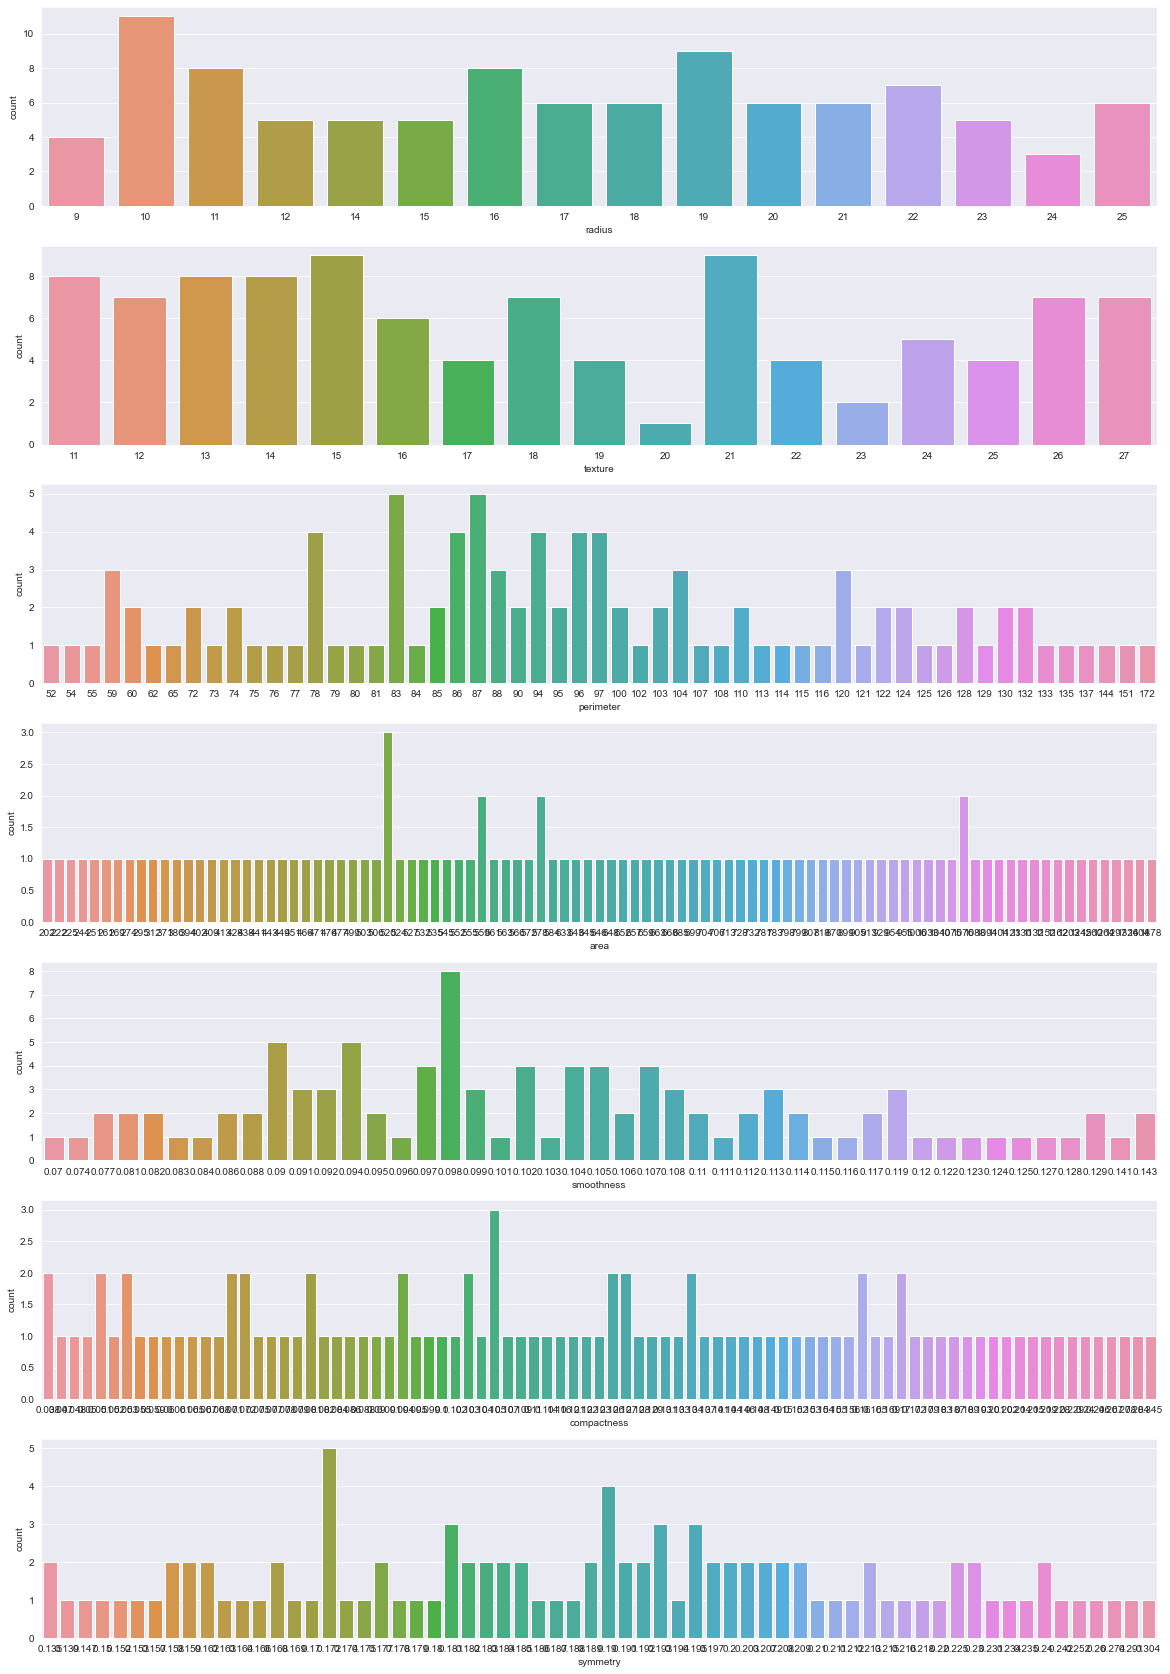

In [6]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,30))
sns.countplot(x='radius', data=df, ax=ax1)
sns.countplot(x='texture', data=df, ax=ax2)
sns.countplot(x='perimeter', data=df, ax=ax3)
sns.countplot(x='area', data=df, ax=ax4)
sns.countplot(x='smoothness', data=df, ax=ax5)
sns.countplot(x='compactness', data=df, ax=ax6)
sns.countplot(x='symmetry', data=df, ax=ax7)

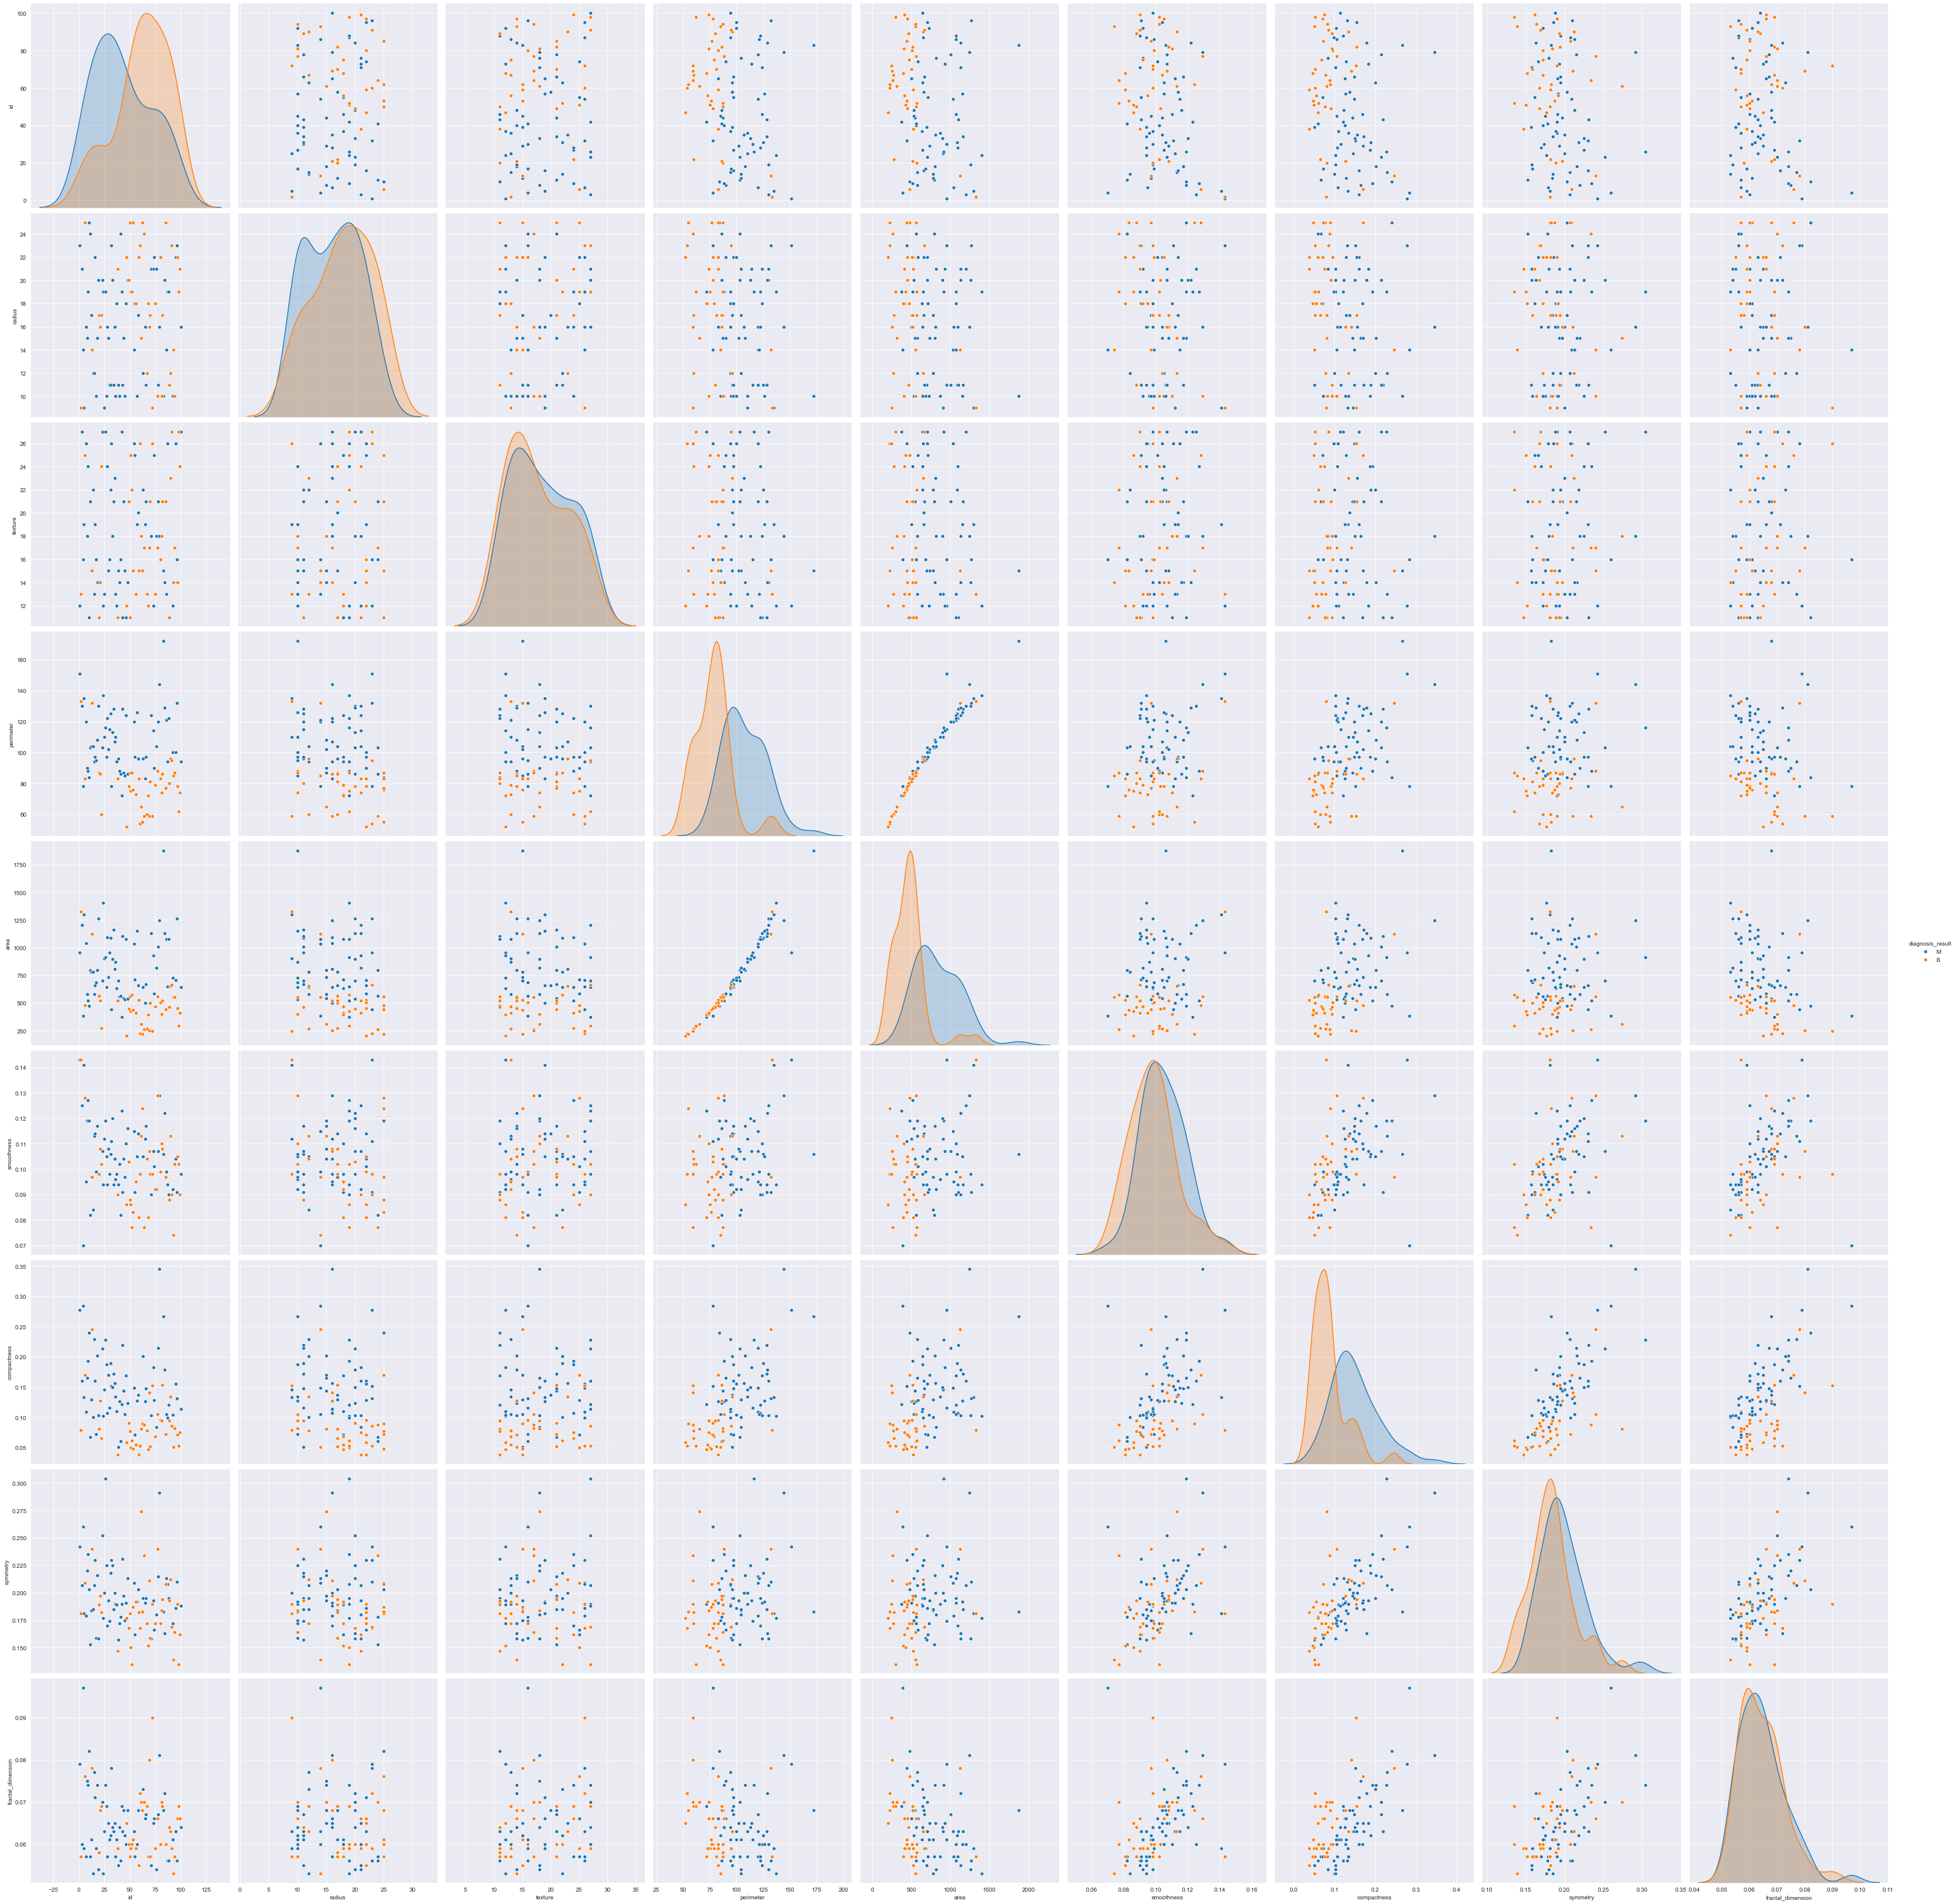

In [7]:
sns.pairplot(df,hue="diagnosis_result",size=5)

## Data Preprocessing

In [8]:
#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [9]:
np.random.seed(40)
df = df.iloc[np.random.permutation(len(df))]

X = df.iloc[:,2:9]
Y = df.iloc[:,1]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Model Building & Training

In [10]:
def models(X_train, Y_train):
    #Linear Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    #Tree Methid
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
    tree.fit(X_train, Y_train)
    
    forest = RandomForestClassifier(n_estimators = 10, criterion="entropy", random_state=0)
    forest.fit(X_train, Y_train)
    
    #SVM
    from sklearn.svm import SVC
    svm = SVC(random_state=42)
    svm.fit(X_train,Y_train)
    
    return [log,tree,forest,svm]

In [11]:
models = models(X_train, Y_train)

## Evaluation

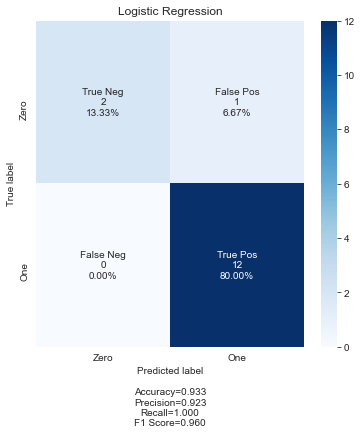

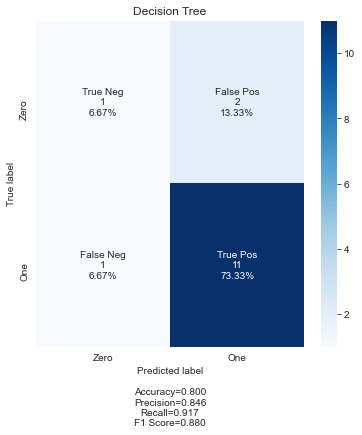

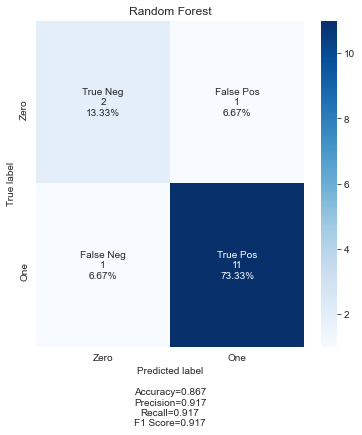

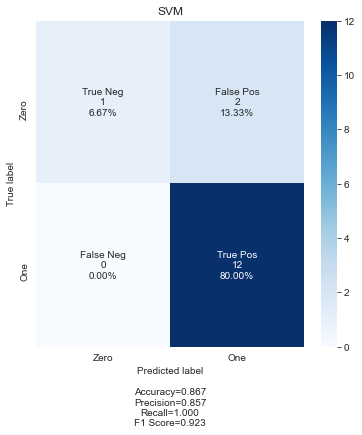

In [12]:
from utils import make_confusion_matrix
from sklearn.metrics import confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
titles = ['Logistic Regression','Decision Tree','Random Forest','SVM']
for i in range(4):
    Y_pred = models[i].predict(X_test)    
        
    make_confusion_matrix(confusion_matrix(Y_test,Y_pred), 
                        group_names=labels,
                        title = titles[i],
                        figsize = (6,6),
                        categories=categories)

In [13]:
import pickle
Pkl_Filename = "Pickle_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(models[1], file)